In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
df=pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
df.sample(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3,1
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [7]:
df=df.drop([164]).reset_index(drop=True)

In [8]:
df.loc[163:166,:]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
165,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
166,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0


In [9]:
df.duplicated().sum()

0

In [10]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [11]:
cat=['sex','cp','fbs','restecg','exng','slp','caa','thall']
for i in df[cat]:
    df[i]=df[i].astype('category')

In [12]:
df['sex']=df['sex'].replace({1:'female',0:'male'})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       302 non-null    int64   
 1   sex       302 non-null    object  
 2   cp        302 non-null    category
 3   trtbps    302 non-null    int64   
 4   chol      302 non-null    int64   
 5   fbs       302 non-null    category
 6   restecg   302 non-null    category
 7   thalachh  302 non-null    int64   
 8   exng      302 non-null    category
 9   oldpeak   302 non-null    float64 
 10  slp       302 non-null    category
 11  caa       302 non-null    category
 12  thall     302 non-null    category
 13  output    302 non-null    int64   
dtypes: category(7), float64(1), int64(5), object(1)
memory usage: 19.8+ KB


<AxesSubplot:>

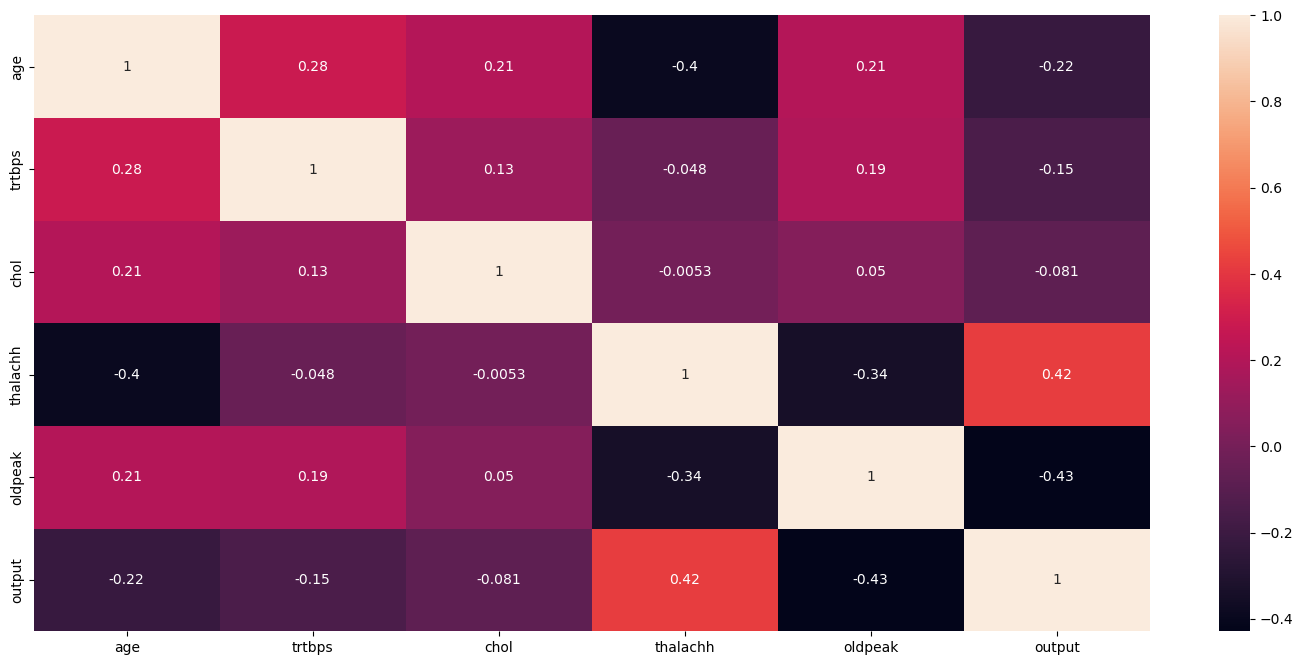

In [14]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)

In [15]:
fig = px.pie(df['sex'].value_counts().reset_index(), values='sex', names='index', width=500,
    height=500)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [16]:
fig = px.bar(df, x='sex', width=500, height=500)
fig.show()

In [17]:
age_chol_df = df.groupby('age',as_index=False)['chol'].mean()
age_chol_df.style.background_gradient(cmap='Reds')

,age,chol
0,29,204.000000
1,34,196.000000
2,35,213.750000
3,37,232.500000
4,38,203.000000
5,39,239.750000
6,40,196.333333
7,41,220.700000
8,42,246.750000
9,43,256.750000


In [18]:
for i in df[cat]:
    print('{},unique:{}'.format(i,len(df[i].unique())))

sex,unique:2
cp,unique:4
fbs,unique:2
restecg,unique:3
exng,unique:2
slp,unique:3
caa,unique:5
thall,unique:4


In [19]:
fig = px.pie(df['cp'].value_counts().reset_index(), values='cp', names='index', width=400,height=400)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show() 
fig = px.pie(df['fbs'].value_counts().reset_index(), values='fbs', names='index', width=400,height=400)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show() 
fig = px.pie(df['restecg'].value_counts().reset_index(), values='restecg', names='index', width=400,height=400)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show() 
fig = px.pie(df['exng'].value_counts().reset_index(), values='exng', names='index', width=400,height=400)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show() 
fig = px.pie(df['slp'].value_counts().reset_index(), values='slp', names='index', width=400,height=400)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show() 
fig = px.pie(df['caa'].value_counts().reset_index(), values='caa', names='index', width=400,height=400)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show() 
fig = px.pie(df['thall'].value_counts().reset_index(), values='thall', names='index', width=400,height=400)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show() 

In [20]:
fig = px.bar(df, x='cp', width=500, height=500)
fig.show()
fig = px.bar(df, x='fbs', width=500, height=500)
fig.show()
fig = px.bar(df, x='restecg', width=500, height=500)
fig.show()
fig = px.bar(df, x='exng', width=500, height=500)
fig.show()
fig = px.bar(df, x='slp', width=500, height=500)
fig.show()
fig = px.bar(df, x='caa', width=500, height=500)
fig.show()
fig = px.bar(df, x='thall', width=500, height=500)
fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




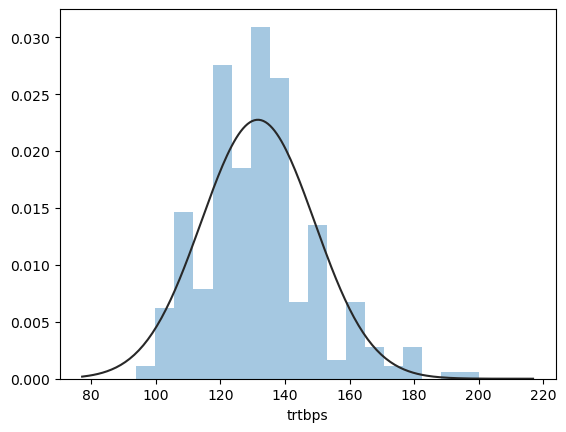

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




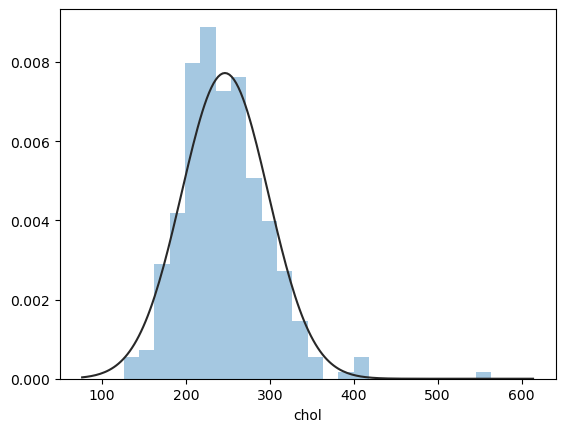

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




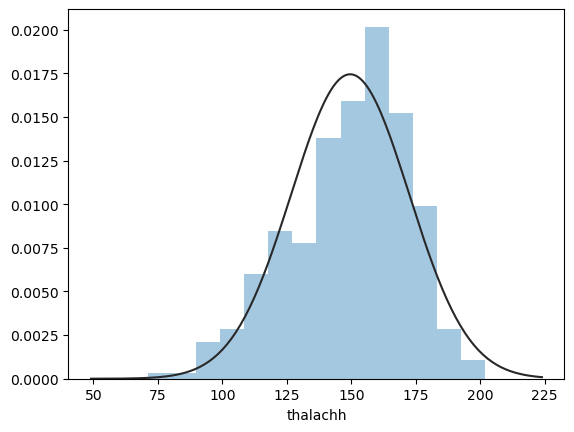

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




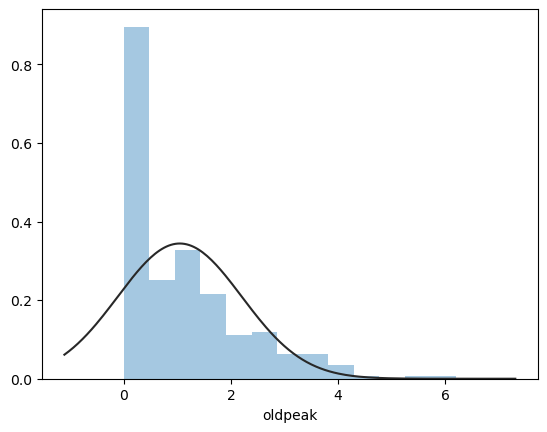

In [21]:
from scipy.stats import norm

sns.distplot(df['trtbps'], fit=norm, kde=False)
plt.show()
sns.distplot(df['chol'], fit=norm, kde=False)
plt.show()
sns.distplot(df['thalachh'], fit=norm, kde=False)
plt.show()
sns.distplot(df['oldpeak'], fit=norm, kde=False)
plt.show()

In [22]:
fig = px.histogram(df, x='age', color="sex")
fig.show()
fig = px.histogram(df, x='age', color="cp")
fig.show()
fig = px.histogram(df, x='age', color="fbs")
fig.show()
fig = px.histogram(df, x='age', color="restecg")
fig.show()
fig = px.histogram(df, x='age', color="exng")
fig.show()
fig = px.histogram(df, x='age', color="slp")
fig.show()
fig = px.histogram(df, x='age', color="caa")
fig.show()
fig = px.histogram(df, x='age', color="thall")
fig.show()

<AxesSubplot:>

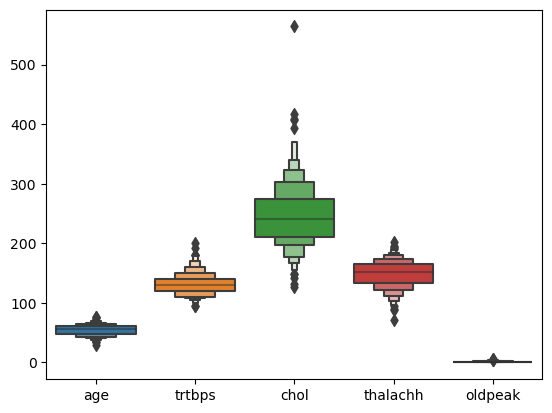

In [23]:
#outlier
num=['age','trtbps','chol','thalachh','oldpeak']
sns.boxenplot(data = df[num])

In [24]:
# Removing Outliers
for i in df[num]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df[i])
    for j in df[i]:
        if j > Upper_tail or j < Lower_tail:
            df[i] = df[i].replace(j, med)

<AxesSubplot:>

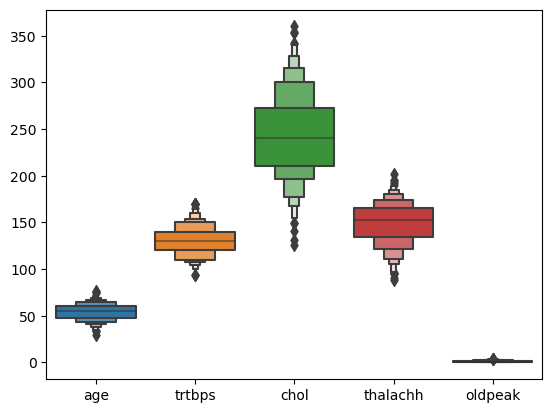

In [25]:
sns.boxenplot(data = df[num])

In [26]:
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 

In [27]:
df['sex']=df['sex'].replace({'female':1,'male':0})

In [28]:
x=df.drop(['output'],axis=1)
y=df['output']

In [29]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, random_state=88)

Accuracy for linear SVM is 0.7540983606557377


<AxesSubplot:>

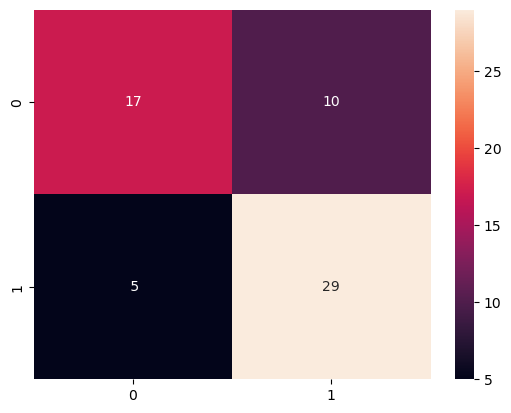

In [30]:
#linear-SVM
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))
sns.heatmap(confusion_matrix(test_Y,prediction2),annot=True,fmt='2.0f')

Accuracy for rbf SVM is  0.5573770491803278


<AxesSubplot:>

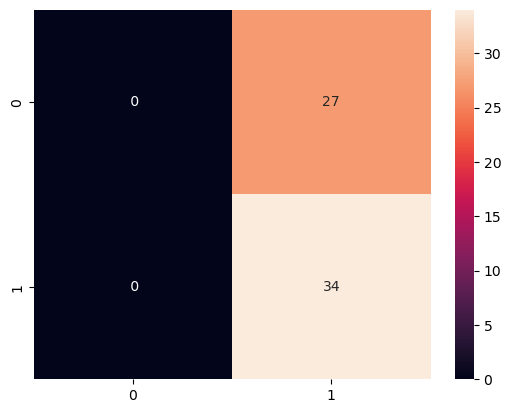

In [31]:
#rbf-SVM
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))
sns.heatmap(confusion_matrix(test_Y,prediction1),annot=True,fmt='2.0f')